<h2>Data Analytics- notebook for Bike data</h2>


<h4><b>Dataset name / short description:</b></h4>

<b>Used mototcycle details details created by web scraping<\b>

<h4><b>Data source (url):</b></h4>

<a href="https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset?resource=download">https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset?resource=download</a>

<h4><b>Data format:</b></h4>

single csv-file

<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [88]:
# importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
bike = pd.read_csv("Bike details.csv")
bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


<h3><b>Code: Data clean-up procedure</b></h3>

In [89]:

# the bike name is not needed here 
# so I would drop this
bike = bike.drop('name', axis=1)

# The seller type is actually not needed 
# all the bikes were sold by an individual 
bike = bike.drop('seller_type', axis=1)
bike

# there are some missing values for the ex showroom price 
# I wanted to fill everything with the ex_showroom_price average but i discover that it was abad idea
# bike['ex_showroom_price'].fillna(bike['ex_showroom_price'].mean(), inplace=True)
# bike['ex_showroom_price']=bike['ex_showroom_price'].astype(int)

# After studying the dataset i discovered that the difference between the selling_price and ex_showroom_price is not that much
# so i would fill the missing values in ex_showroom_price with a little variation from the selling_price
# they would be random values with 5% variation from the selling price
missing_values = bike['ex_showroom_price'].isnull()

variation = 0.05  
random_value = np.random.uniform(bike['selling_price'], bike['selling_price'].std() * variation)
bike.loc[missing_values, 'ex_showroom_price'] = (bike['selling_price'][missing_values] + random_value[missing_values]).astype(int)


# our helper function to create the price difference
# between selling price and ex-showroom price
def percentage_difference(row):
    selling = row['selling_price']
    show = row['ex_showroom_price']

    # the difference in decimal format
    result = 1 - round(selling / show, 2)
    return result

# let's use our helper function to make the price difference column!
bike['Price_Difference'] = bike.apply(percentage_difference, axis=1)
bike


,selling_price,year,owner,km_driven,ex_showroom_price,Price_Difference
0,175000,2019,1st owner,350,248298.0,0.30
1,45000,2017,1st owner,5650,53947.0,0.17
2,150000,2018,1st owner,12000,148114.0,-0.01
3,65000,2015,1st owner,23000,89643.0,0.27
4,20000,2011,2nd owner,21000,28689.0,0.30
...,...,...,...,...,...,...
1056,17000,2010,1st owner,500000,52000.0,0.67
1057,16000,2012,1st owner,33000,51000.0,0.69
1058,15000,2013,2nd owner,35000,57000.0,0.74
1059,12000,2009,1st owner,53000,58000.0,0.79


<h3><b>Code: Data analysis</b></h3>

<AxesSubplot: >

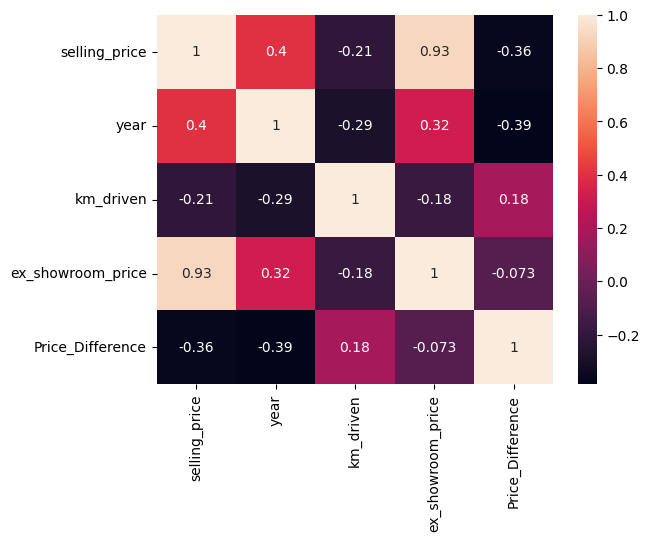

In [90]:
# To create a correlation for a all the columns in the bike dataset
correlations = bike.corr(numeric_only=True)

# plot correlation matrix
sns.heatmap(correlations, annot=True)

In [91]:
# There's a very high correlation between the ex_showroom price and the selling_price the ex_showroom price is actually deteremined by the
# selling price of the vehicle 

# the selling_price of the bike is also determined by the year the bike was made, there's a little bit of correlation there

# The year the bike was made affects the price difference 

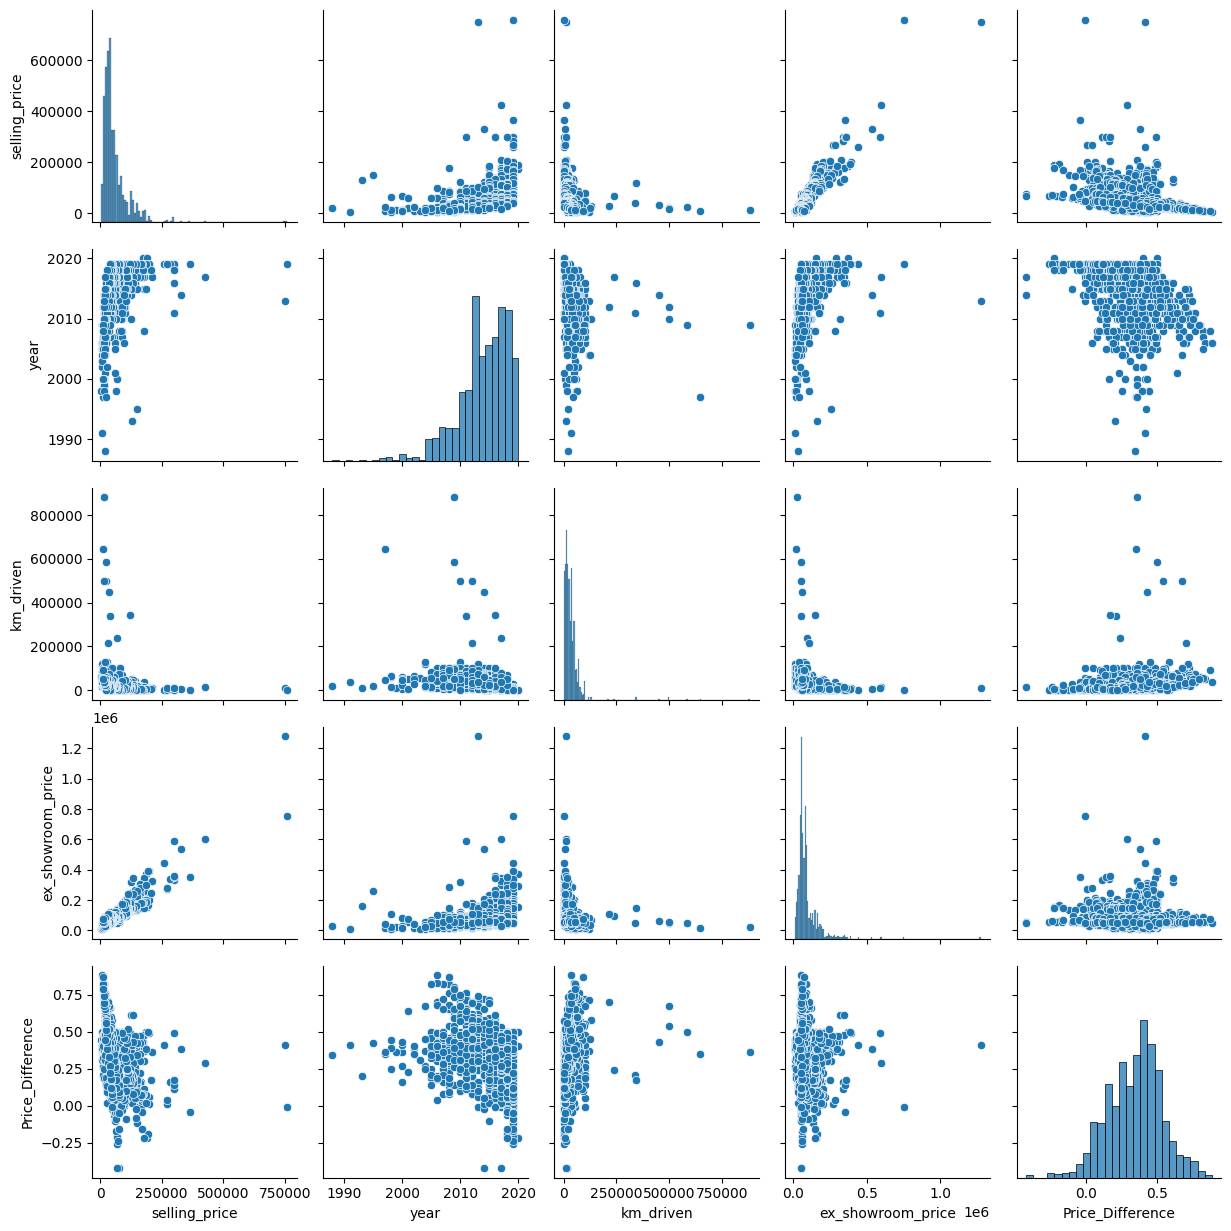

In [92]:
# a simple pair plot, can we see any correlation between the columns
# look for diagonally scattered data (in this case, compare prices 
# and the price difference). 
# diagonally from bottom left to top right = positive correlation
# diagonally from top left to bottom right = negative correlation
sns.pairplot(bike)

In [94]:
# According to this pairplot i can see a positive correlation between the ex_showroom price and the selling_price
# Most the other plots are just really scattered


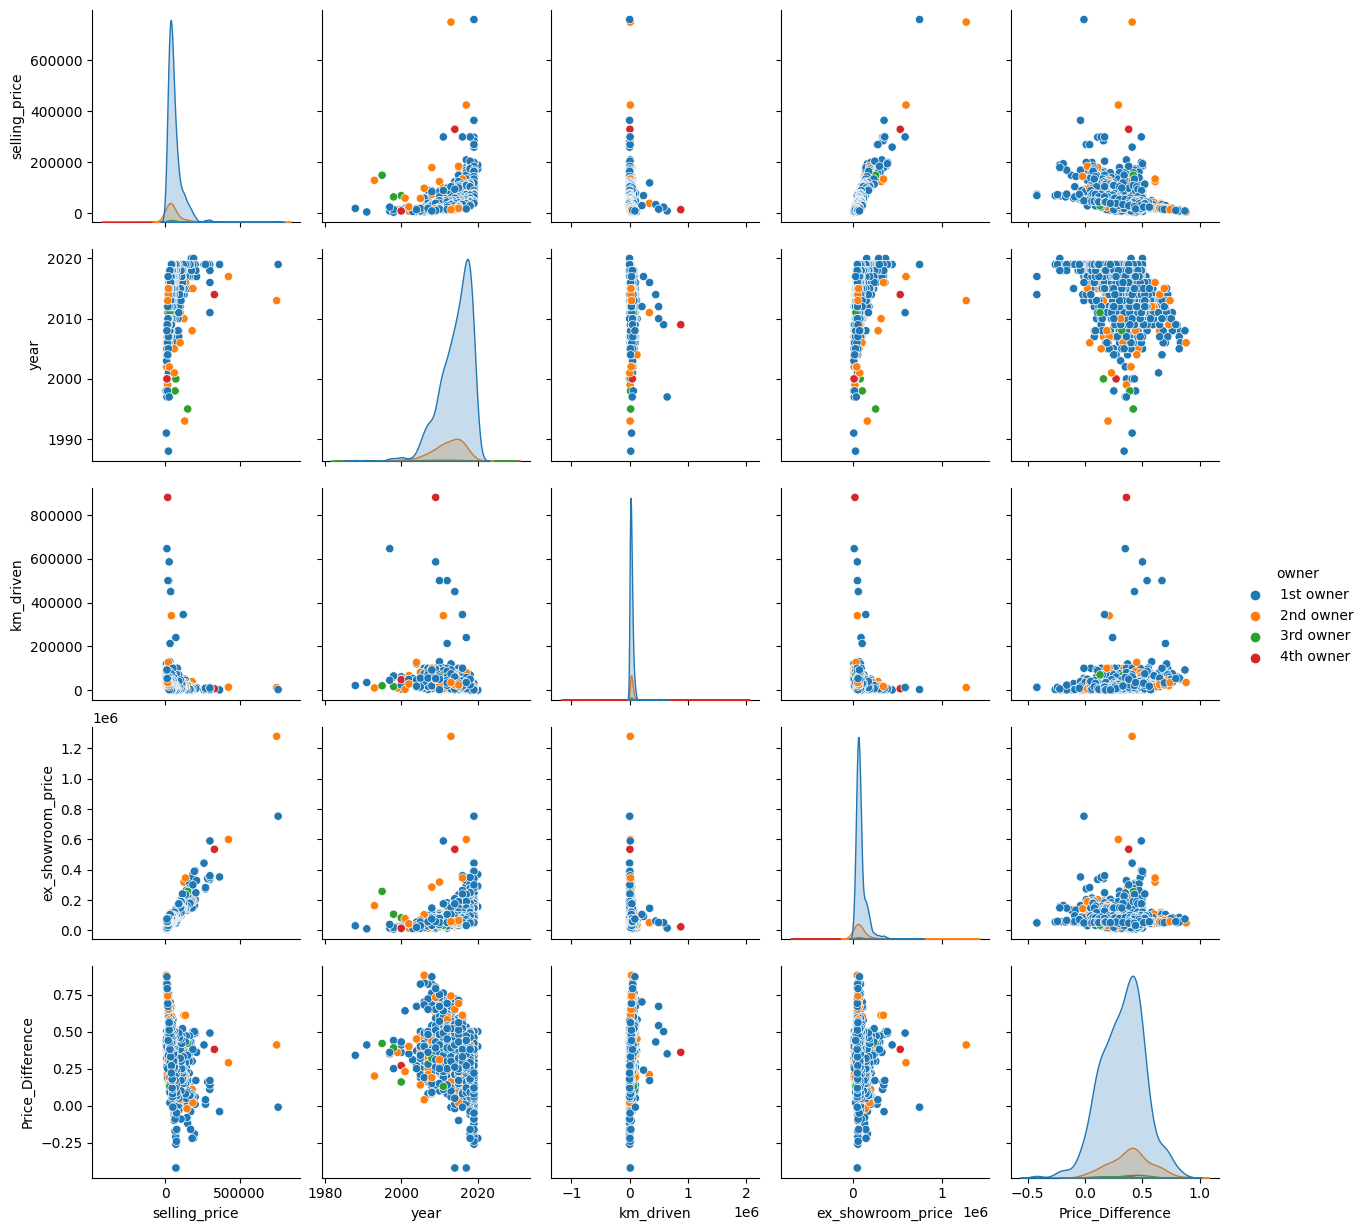

In [93]:
# a simple pair plot, can we see any correlation between the columns
# hue="owner"
sns.pairplot(bike, hue='owner')

In [ ]:
# According to this pairplot with hue = "owner" I can see that most of these bikes were sold by the 1st owner

<h3><b>Results and summary:</b></h3>

This shows that the selling price is a great factor on determining the actual ex_showroom_price fro any bike.

Most these bikes are bought by the first owner

Most bikers do not like to purchase bikes from a second owner talkess of a third owner

So it's better to get a brand new bike then we would be able to sell at a good price 



<h3><b>Ideas for further improvements:</b></h3>

I feel this dataset could work better with a larger data set.
